In [1]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras import layers
from tensorflow.keras.models import Model
import numpy as np

In [2]:
base_model = VGG16(weights='imagenet', include_top=False)

58889256/58889256 [==============================] - 0s 0us/step


In [5]:
# 連接自訂層
x = base_model.output
# x = layers.Flatten()(x)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(256, activation='relu')(x)
#x = layers.Dropout(0.2)(x)
x = layers.Dense(64, activation='relu')(x)
x = layers.Dense(2, activation='sigmoid')(x)

# 設定新模型的 inputs/outputs
model = Model(inputs=base_model.input, outputs=x)

In [6]:
# VGG16 原有的層均不重新訓練
for layer in base_model.layers:
    layer.trainable = False

model.compile(optimizer='adam', loss='binary_crossentropy')

In [7]:
!unzip with_mask.zip

Archive:  with_mask.zip
  inflating: with_mask/0-with-mask.jpg  
  inflating: with_mask/100-with-mask.jpg  
  inflating: with_mask/101-with-mask.jpg  
  inflating: with_mask/103-with-mask.jpg  
  inflating: with_mask/104-with-mask.jpg  
  inflating: with_mask/105-with-mask.jpg  
  inflating: with_mask/106-with-mask.jpg  
  inflating: with_mask/107-with-mask.jpg  
  inflating: with_mask/108-with-mask.jpg  
  inflating: with_mask/109-with-mask.jpg  
  inflating: with_mask/10-with-mask.jpg  
  inflating: with_mask/110-with-mask.jpg  
  inflating: with_mask/111-with-mask.jpg  
  inflating: with_mask/112-with-mask.jpg  
  inflating: with_mask/113-with-mask.jpg  
  inflating: with_mask/114-with-mask.jpg  
  inflating: with_mask/115-with-mask.jpg  
  inflating: with_mask/116-with-mask.jpg  
  inflating: with_mask/117-with-mask.jpg  
  inflating: with_mask/118-with-mask.jpg  
  inflating: with_mask/119-with-mask.jpg  
  inflating: with_mask/11-with-mask.jpg  
  inflating: with_mask/120-with-ma

In [8]:
!unzip without_mask.zip

Archive:  without_mask.zip
  inflating: without_mask/0.jpg      
  inflating: without_mask/1.jpg      
  inflating: without_mask/10.jpg     
  inflating: without_mask/100.jpg    
  inflating: without_mask/101.jpg    
  inflating: without_mask/102.jpg    
  inflating: without_mask/104.jpg    
  inflating: without_mask/105.jpg    
  inflating: without_mask/106.jpg    
  inflating: without_mask/107.jpg    
  inflating: without_mask/108.jpg    
  inflating: without_mask/109.jpg    
  inflating: without_mask/11.jpg     
  inflating: without_mask/110.jpg    
  inflating: without_mask/111.jpg    
  inflating: without_mask/112.jpg    
  inflating: without_mask/114.jpg    
  inflating: without_mask/115.jpg    
  inflating: without_mask/116.jpg    
  inflating: without_mask/117.jpg    
  inflating: without_mask/118.jpg    
  inflating: without_mask/119.jpg    
  inflating: without_mask/12.jpg     
  inflating: without_mask/120.jpg    
  inflating: without_mask/122.jpg    
  inflating: without_ma

In [9]:
import os
from os import listdir
from os.path import join, isfile

# 讀取 data/with_mask 目錄下所有圖片檔名
img_path = './with_mask/'
image_files = np.array([join(img_path, f) for f in listdir(img_path) if isfile(join(img_path, f)) and f[-3:] == 'jpg'])

# 讀取 data/without_mask 目錄下所有圖片檔名
img_path = './without_mask/'
image_files2 = np.array([join(img_path, f) for f in listdir(img_path) if isfile(join(img_path, f)) and f[-3:] == 'jpg'])

In [10]:
X = np.array([])
# 讀取 data/without_mask 目錄下所有圖檔
for f in image_files2:
    # 載入圖檔，並縮放寬高為 (224, 224)
    img = image.load_img(f, target_size=(224, 224))
    # 加一維，變成 (1, 224, 224, 3)，最後一維是色彩
    img2 = image.img_to_array(img)
    img2 = np.expand_dims(img2, axis=0)
    if len(X.shape) == 1:
        X = img2
    else:
        X = np.concatenate((X, img2), axis=0)

In [11]:
# 讀取 data/with_mask 目錄下所有圖檔
for f in image_files:
    # 載入圖檔，並縮放寬高為 (224, 224)
    img = image.load_img(f, target_size=(224, 224))
    # 加一維，變成 (1, 224, 224, 3)，最後一維是色彩
    img2 = image.img_to_array(img)
    img2 = np.expand_dims(img2, axis=0)
    if len(X.shape) == 1:
        X = img2
    else:
        X = np.concatenate((X, img2), axis=0)

X = preprocess_input(X)

In [12]:
from tensorflow.keras.utils import to_categorical

y = np.concatenate((np.zeros(image_files2.shape[0]), np.ones(image_files.shape[0])))
# one-hot encoding
y = to_categorical(y, num_classes=2)

In [13]:
model.fit(X, y, epochs=5, validation_split=0.2, verbose=2)

Epoch 1/5
35/35 - 31s - loss: 0.2465 - val_loss: 0.0127 - 31s/epoch - 889ms/step
Epoch 2/5
35/35 - 6s - loss: 0.0335 - val_loss: 0.0071 - 6s/epoch - 170ms/step
Epoch 3/5
35/35 - 6s - loss: 0.0159 - val_loss: 0.0598 - 6s/epoch - 172ms/step
Epoch 4/5
35/35 - 6s - loss: 0.0157 - val_loss: 0.0510 - 6s/epoch - 175ms/step
Epoch 5/5
35/35 - 6s - loss: 0.0128 - val_loss: 0.0215 - 6s/epoch - 175ms/step


In [14]:
model.save('model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 0s 22ms/step
戴口罩機率：100.00


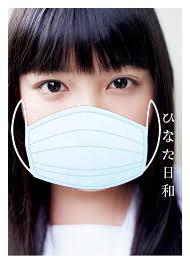

In [ ]:
# 任意一張圖片測試
img_path = './test_image/127-with-mask.jpg'
# img_path = './test_image/11.jpg'
# 載入圖檔，並縮放寬高為 (224, 224)
img = image.load_img(img_path, target_size=(224, 224))
# 加一維，變成 (1, 224, 224, 3)，最後一維是色彩
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

print(f'戴口罩機率：{round(model.predict(x)[0][1] * 100, 2):.2f}')

from IPython.display import Image
Image(img_path, width=200)